In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df1 = pd.read_csv('AD-Tech.csv')
df = df1.sample(n=50000,random_state=10).reset_index(drop=True)


In [2]:
df.columns

Index(['date', 'site_id', 'ad_type_id', 'geo_id', 'device_category_id',
       'advertiser_id', 'order_id', 'line_item_type_id', 'os_id',
       'integration_type_id', 'monetization_channel_id', 'ad_unit_id',
       'total_impressions', 'total_revenue', 'viewable_impressions',
       'measurable_impressions', 'revenue_share_percent'],
      dtype='object')

In [3]:
cat_col=['date','geo_id','order_id','site_id', 'ad_type_id','device_category_id', 'advertiser_id',
         'line_item_type_id', 'os_id','monetization_channel_id']

scat_col = ['site_id', 'ad_type_id','device_category_id', 'advertiser_id',
         'line_item_type_id', 'os_id','monetization_channel_id']

for i in cat_col:
    df[i]=df[i].astype('object')

In [4]:
df.drop(['ad_unit_id','revenue_share_percent','integration_type_id'],axis=1,inplace=True)
df.drop(['ad_type_id','site_id','advertiser_id'],axis=1,inplace=True)
df.drop(['date','geo_id','order_id'],axis=1,inplace=True)

In [5]:
Xd = df.drop('total_revenue',axis=1)
y = df['total_revenue']

In [6]:
X=pd.get_dummies(Xd,drop_first=True)

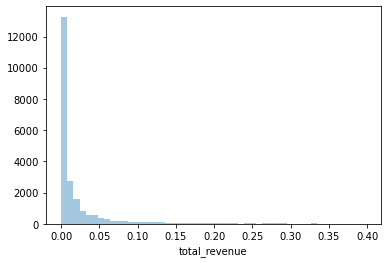

In [14]:
sns.distplot(y[(y<=0.4) & (y>0)],kde=False)
plt.show()

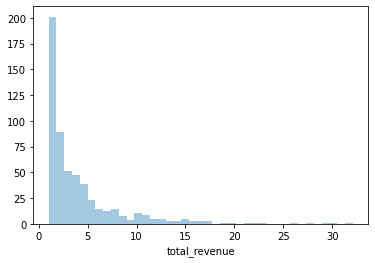

In [15]:
sns.distplot(y[y>1],kde=False)
plt.show()

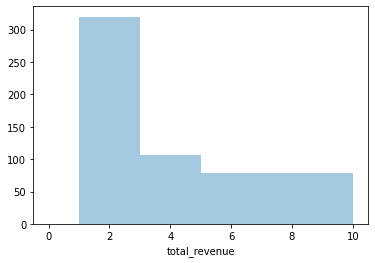

In [17]:
sns.distplot(y[y>1],kde=False,bins=[0,1,3,5,10])
plt.show()

In [46]:
cls=y.apply(lambda x: 0 if x==0 else 1)

In [47]:
pc_col=['total_impressions', 'viewable_impressions', 'measurable_impressions']

In [48]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [49]:
X[pc_col]=pd.DataFrame(ss.fit_transform(X[pc_col]),columns=[pc_col])

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,cls,test_size=0.2,random_state=4)

In [62]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X[pc_col])

PCA()

In [63]:
np.cumsum(pca.explained_variance_ratio_)

array([0.95351914, 0.99851015, 1.        ])

In [64]:
pca = PCA(n_components=1)
X_train['PC'] = pca.fit_transform(X_train[pc_col])
X_test['PC'] = pca.transform(X_test[pc_col])

In [65]:
X_train.drop(pc_col,axis=1,inplace=True)
X_test.drop(pc_col,axis=1,inplace=True)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score,confusion_matrix,precision_score,recall_score

In [73]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)
y_train_prob=lr.predict_proba(X_train)[:,1]

print('Train')
print('ROC AUC Score:',roc_auc_score(y_train,y_train_prob))
print('F1 Score:',f1_score(y_train,y_train_pred))
print('Accuracy Score:',accuracy_score(y_train,y_train_pred))
print('Precision Score',precision_score(y_train,y_train_pred))
print('Recall Score',recall_score(y_train,y_train_pred))

y_test_pred=lr.predict(X_test)
y_test_prob=lr.predict_proba(X_test)[:,1]

print('\n\nTest')
print('ROC AUC Score:',roc_auc_score(y_test,y_test_prob))
print('F1 Score:',f1_score(y_test,y_test_pred))
print('Accuracy Score:',accuracy_score(y_test,y_test_pred))
print('Precision Score',precision_score(y_test,y_test_pred))
print('Recall Score',recall_score(y_test,y_test_pred))

Train
ROC AUC Score: 0.9311558627932655
F1 Score: 0.8549622352506207
Accuracy Score: 0.8627
Precision Score 0.856727003281465
Recall Score 0.8532047227493148


Test
ROC AUC Score: 0.9348302816018457
F1 Score: 0.8610198240220504
Accuracy Score: 0.8689
Precision Score 0.8625743415463042
Recall Score 0.8594708994708995


In [74]:
from sklearn.metrics import classification_report

In [75]:
print('Classification')
print('\nTrain') 
print(classification_report(y_train,y_train_pred))
print('\nTest') 
print(classification_report(y_test,y_test_pred))

Classification

Train
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     21028
           1       0.86      0.85      0.85     18972

    accuracy                           0.86     40000
   macro avg       0.86      0.86      0.86     40000
weighted avg       0.86      0.86      0.86     40000


Test
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      5275
           1       0.86      0.86      0.86      4725

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [77]:
print('Confusion Matrix')
print('\nTrain') 
print(confusion_matrix(y_train,y_train_pred))
print('\nTest') 
print(confusion_matrix(y_test,y_test_pred))

Confusion Matrix

Train
[[18321  2707]
 [ 2785 16187]]

Test
[[4628  647]
 [ 664 4061]]


In [78]:
from sklearn.metrics import roc_curve

In [92]:
fpr, tpr, thresholds = roc_curve(y_test,y_test_prob)

In [93]:
thresholds[0]=thresholds[0]-1

In [94]:
thresholds

array([1.00000000e+00, 1.00000000e+00, 9.99999999e-01, 9.99999999e-01,
       9.98450667e-01, 9.98429434e-01, 9.95255157e-01, 9.95254215e-01,
       9.95206876e-01, 9.95157145e-01, 9.95108086e-01, 9.95105929e-01,
       9.95056137e-01, 9.95055156e-01, 9.95004850e-01, 9.93594752e-01,
       9.93528403e-01, 9.93260117e-01, 9.93190326e-01, 9.93188977e-01,
       9.93119817e-01, 9.91252994e-01, 9.91138325e-01, 9.82035368e-01,
       9.81897700e-01, 9.81787057e-01, 9.81712417e-01, 9.81708836e-01,
       9.81525273e-01, 9.76663052e-01, 9.76539458e-01, 9.76309882e-01,
       9.76073458e-01, 9.75835773e-01, 9.75820620e-01, 9.75580487e-01,
       9.75579435e-01, 9.75451423e-01, 9.75335906e-01, 9.75331108e-01,
       9.75284444e-01, 9.75085165e-01, 9.73009979e-01, 9.72736253e-01,
       9.72459830e-01, 9.72186078e-01, 9.72127036e-01, 9.71904237e-01,
       9.69380308e-01, 9.69192571e-01, 9.67072051e-01, 9.66949301e-01,
       9.66763311e-01, 9.66616219e-01, 9.66609783e-01, 9.66279896e-01,
      

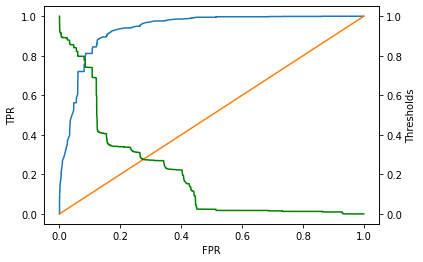

In [95]:
fig,ax = plt.subplots()
ax.plot(fpr,tpr)
ax.plot(fpr,fpr)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax1=ax.twinx()
ax1.plot(fpr,thresholds,color='g')
ax1.set_ylabel('Thresholds')
plt.show()